In [1]:
import pandas as pd
import matplotlib
%matplotlib inline 
import numpy as np

In [2]:
### Data transformation from previous notebooks
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

# Grouping

Pandas allows us to perform aggregates calculations over grouped portions of ``Series`` or ``DataFrames``. The ``.groupby`` method is the low level workhorse that enables this.

In [4]:
# We can group by a column, but if it has unique values it isn't useful
nyc.groupby('EST').mean()['CloudCover']

EST
2006-01-01    8.0
2006-01-02    5.0
2006-01-03    8.0
2006-01-04    3.0
2006-01-05    6.0
2006-01-06    7.0
2006-01-07    2.0
2006-01-08    3.0
2006-01-09    1.0
2006-01-10    1.0
2006-01-11    7.0
2006-01-12    0.0
2006-01-13    5.0
2006-01-14    8.0
2006-01-15    5.0
2006-01-16    0.0
2006-01-17    5.0
2006-01-18    7.0
2006-01-19    0.0
2006-01-20    0.0
2006-01-21    2.0
2006-01-22    1.0
2006-01-23    7.0
2006-01-24    1.0
2006-01-25    4.0
2006-01-26    1.0
2006-01-27    0.0
2006-01-28    0.0
2006-01-29    5.0
2006-01-30    4.0
             ... 
2014-12-02    7.0
2014-12-03    7.0
2014-12-04    0.0
2014-12-05    6.0
2014-12-06    8.0
2014-12-07    1.0
2014-12-08    6.0
2014-12-09    8.0
2014-12-10    8.0
2014-12-11    7.0
2014-12-12    6.0
2014-12-13    2.0
2014-12-14    4.0
2014-12-15    0.0
2014-12-16    7.0
2014-12-17    7.0
2014-12-18    6.0
2014-12-19    5.0
2014-12-20    8.0
2014-12-21    8.0
2014-12-22    8.0
2014-12-23    8.0
2014-12-24    8.0
2014-12-25    5.0
2014-1

In [5]:
# Let's get the average cloud cover each month
nyc.groupby(nyc.EST.dt.month).mean()['CloudCover']

EST
1     3.583643
2     3.397638
3     3.530466
4     3.381481
5     3.301075
6     3.088889
7     2.268817
8     2.573477
9     2.811111
10    3.462366
11    3.411111
12    3.989247
Name: CloudCover, dtype: float64

In [7]:
# The previous aggregated over every month, 
# what if we want to group by year and month?
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).mean()['CloudCover']

year  EST
2006  1      3.677419
      2      3.035714
      3      2.483871
      4      2.600000
      5      3.161290
      6      3.800000
      7      1.580645
      8      2.548387
      9      3.166667
      10     3.387097
      11     4.133333
      12     3.064516
2007  1      4.096774
      2      2.785714
      3      3.258065
      4      4.700000
      5      1.903226
      6      2.500000
      7      2.161290
      8      2.774194
      9      1.600000
      10     3.548387
      11     3.633333
      12     4.709677
2008  1      3.161290
      2      4.310345
      3      3.677419
      4      3.800000
      5      3.322581
      6      2.366667
               ...   
2012  7      2.677419
      8      2.129032
      9      3.266667
      10     4.096774
      11     2.666667
      12     4.580645
2013  1      3.516129
      2      4.392857
      3      4.290323
      4      2.833333
      5      3.193548
      6      2.933333
      7      3.096774
      8      2.935484


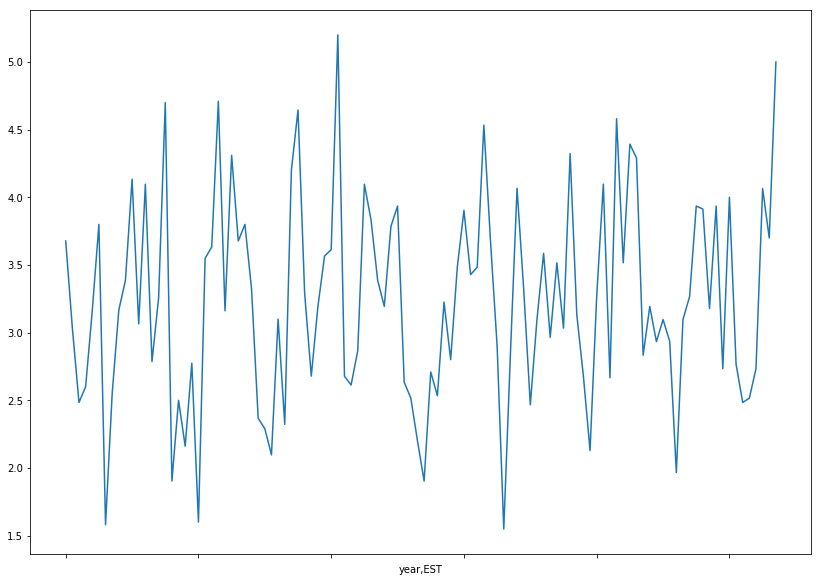

In [8]:
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).mean(
)['CloudCover'].plot(figsize=(14,10))

In [9]:
# With the .agg method we can apply many functions
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).agg(['mean', 'max', 'count'])

Max_TemperatureF              Mean_TemperatureF              \
                     mean    max count              mean   max count   
year EST                                                               
2006 1          47.548387   64.0    31         41.161290  53.0    31   
     2          42.321429   62.0    28         35.928571  54.0    28   
     3          50.129032   74.0    31         43.032258  61.0    31   
     4          64.866667   82.0    30         55.266667  70.0    30   
     5          71.387097   88.0    31         62.838710  78.0    31   
     6          77.233333   91.0    30         70.600000  81.0    30   
     7          84.935484   95.0    31         77.677419  86.0    31   
     8          82.838710   97.0    31         76.096774  90.0    31   
     9          73.066667   83.0    30         66.866667  75.0    30   
     10         63.290323   79.0    31         56.483871  71.0    31   
     11         57.400000   69.0    30         52.233333  64.0    30   
     12         49.516129   70.0    31         43.870968  60.0    31   
2007 1          43.580645   72.0    31         37.741935  63.0    31   
     2          34.500000   49.0    28         28.428571  44.0    28   
     3          50.935484   78.0    31         42.483871  64.0    31   
     4          57.933333   86.0    30         50.566667  72.0    30   
     5          75.290323   91.0    31         65.483871  78.0    31   
     6          79.566667   91.0    30         71.600000  82.0    30   
     7          82.322581   92.0    31         75.225806  84.0    31   
     8          81.419355   92.0    31         74.354839  84.0    31   
     9          78.000000   88.0    30         70.433333  80.0    30   
     10         70.548387   87.0    31         63.838710  77.0    31   
     11         51.566667   66.0    30         45.666667  58.0    30   
     12         41.580645   61.0    31         37.258065  51.0    31   
2008 1          42.419355   64.0    31         36.806452  59.0    31   
     2          43.137931   68.0    29         36.000000  55.0    29   
     3          50.290323   63.0    31         42.838710  54.0    31   
     4          63.533333   84.0    30         55.300000  71.0    30   
     5          68.935484   83.0    31         60.290323  72.0    31   
     6          82.566667   96.0    30         74.166667  86.0    30   
...                   ...    ...   ...               ...   ...   ...   
2012 7          87.258065  100.0    31         78.967742  87.0    31   
     8          84.161290   91.0    31         76.903226  83.0    31   
     9          75.866667   91.0    30         69.066667  83.0    30   
     10         63.709677   78.0    31         58.322581  70.0    31   
     11         49.700000   66.0    30         44.100000  57.0    30   
     12         46.322581   62.0    31         41.806452  55.0    31   
2013 1          40.838710   61.0    31         35.354839  49.0    31   
     2          39.357143   55.0    28         34.142857  46.0    28   
     3          46.290323   59.0    31         40.387097  50.0    31   
     4          61.300000   82.0    30         53.266667  67.0    30   
     5          71.193548   90.0    31         63.064516  83.0    31   
     6          80.300000   92.0    30         72.866667  83.0    30   
     7          86.322581   98.0    31         79.967742  90.0    31   
     8          81.548387   90.0    31         74.838710  81.0    31   
     9          76.333333   96.0    30         68.200000  87.0    30   
     10         66.903226   86.0    31         60.451613  76.0    31   
     11         52.100000   70.0    30         45.500000  65.0    30   
     12         44.451613   71.0    31         38.741935  66.0    31   
2014 1          35.225806   58.0    31         28.870968  48.0    31   
     2          37.500000   56.0    28         32.000000  49.0    28   
     3          45.516129   66.0    31         37.870968  56.0    31   
     4          61.233333   77.0    30         52

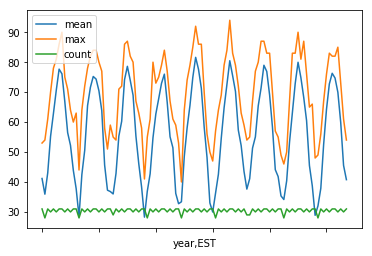

In [10]:
# Then plot
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).agg(
    ['mean', 'max', 'count'])['Mean_TemperatureF'].plot()

In [11]:
# Or just look at a table for a column
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).agg(
    ['mean', 'max', 'count'])['Max_TemperatureF']

mean    max  count
year EST                         
2006 1    47.548387   64.0     31
     2    42.321429   62.0     28
     3    50.129032   74.0     31
     4    64.866667   82.0     30
     5    71.387097   88.0     31
     6    77.233333   91.0     30
     7    84.935484   95.0     31
     8    82.838710   97.0     31
     9    73.066667   83.0     30
     10   63.290323   79.0     31
     11   57.400000   69.0     30
     12   49.516129   70.0     31
2007 1    43.580645   72.0     31
     2    34.500000   49.0     28
     3    50.935484   78.0     31
     4    57.933333   86.0     30
     5    75.290323   91.0     31
     6    79.566667   91.0     30
     7    82.322581   92.0     31
     8    81.419355   92.0     31
     9    78.000000   88.0     30
     10   70.548387   87.0     31
     11   51.566667   66.0     30
     12   41.580645   61.0     31
2008 1    42.419355   64.0     31
     2    43.137931   68.0     29
     3    50.290323   63.0     31
     4    63.533333   84.0     30
     5    68.935484   83.0     31
     6    82.566667   96.0     30
...             ...    ...    ...
2012 7    87.258065  100.0     31
     8    84.161290   91.0     31
     9    75.866667   91.0     30
     10   63.709677   78.0     31
     11   49.700000   66.0     30
     12   46.322581   62.0     31
2013 1    40.838710   61.0     31
     2    39.357143   55.0     28
     3    46.290323   59.0     31
     4    61.300000   82.0     30
     5    71.193548   90.0     31
     6    80.300000   92.0     30
     7    86.322581   98.0     31
     8    81.548387   90.0     31
     9    76.333333   96.0     30
     10   66.903226   86.0     31
     11   52.100000   70.0     30
     12   44.451613   71.0     31
2014 1    35.225806   58.0     31
     2    37.500000   56.0     28
     3    45.516129   66.0     31
     4    61.233333   77.0     30
     5    72.516129   86.0     31
     6    80.433333   89.0     30
     7    83.419355   91.0     31
     8    82.451613   90.0     31
     9    77.266667   92.0     30
     10   65.870968   77.0     31
     11   51.633333   69.0     30
     12   45.129032   65.0     31

[108 rows x 3 columns]

## Grouping Assignment
With the nino dataset:
* Find the mean temperature for each year
* Find the count of entries for each year
* Find the max temperature for each year

In [12]:
# Data transformation from previous notebook
# col names in tao-all2.col from website
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')
nino = pd.read_csv('data/tao-all2.dat.gz', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])
nino.columns = [x.replace('.', '_').replace(' ', '_') for x in nino.columns]
nino['air_temp_F'] = nino.air_temp_ * 9/5 + 32
wind_cols = [x for x in nino.columns if x.endswith('winds')]
for c in wind_cols:
    nino['{}_mph'.format(c)] = nino[c] * 2.237
pd.to_datetime(nino.date, format='%y%m%d')
nino = nino.drop('obs', axis=1)

In [13]:
nino.columns

Index(['year_month_day', 'date', 'latitude', 'longitude', 'zon_winds',
       'mer_winds', 'humidity', 'air_temp_', 's_s_temp_', 'air_temp_F',
       'zon_winds_mph', 'mer_winds_mph'],
      dtype='object')

In [14]:
nino.groupby(nino.year_month_day.dt.year.rename('year')).mean()['air_temp_']

year
1980    22.774337
1981    22.454716
1982    24.640317
1983    25.320099
1984    23.810299
1985    24.913458
1986    26.217397
1987    27.098709
1988    25.203781
1989    26.062927
1990    26.664894
1991    27.043086
1992    27.097112
1993    27.112055
1994    27.058699
1995    26.814457
1996    26.633307
1997    27.571349
1998    27.805985
Name: air_temp_, dtype: float64

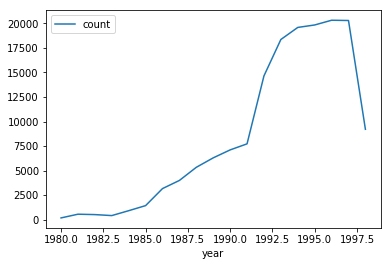

In [19]:
nino.groupby(nino.year_month_day.dt.year.rename('year')).agg(
    ['count'])['air_temp_']

nino.groupby(nino.year_month_day.dt.year.rename('year')).agg(
    ['count'])['air_temp_'].plot()

        max
year       
1980  27.28
1981  27.20
1982  27.50
1983  29.36
1984  27.65
1985  30.04
1986  30.52
1987  30.68
1988  30.86
1989  30.43
1990  30.09
1991  30.02
1992  31.48
1993  30.90
1994  30.31
1995  30.15
1996  30.19
1997  30.13
1998  31.66


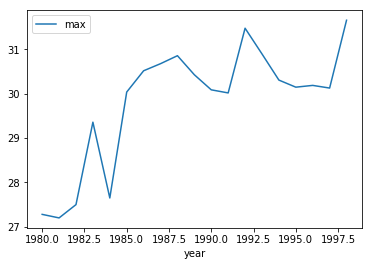

In [22]:
print(nino.groupby(nino.year_month_day.dt.year.rename('year')).agg(
    ['max'])['air_temp_'])

_=nino.groupby(nino.year_month_day.dt.year.rename('year')).agg(
    ['max'])['air_temp_'].plot()

# Pivoting

In [23]:
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF'])

amax               count_nonzero             
         Max_Dew_PointF Max_Humidity Max_Dew_PointF Max_Humidity
year EST                                                        
2006 1             55.0        100.0           31.0         31.0
     2             55.0        100.0           28.0         28.0
     3             52.0        100.0           31.0         31.0
     4             57.0        100.0           30.0         30.0
     5             68.0        100.0           31.0         31.0
     6             72.0        100.0           30.0         30.0
     7             76.0        100.0           31.0         31.0
     8             77.0        100.0           31.0         31.0
     9             70.0        100.0           30.0         30.0
     10            65.0        100.0           31.0         31.0
     11            63.0        100.0           30.0         30.0
     12            63.0        100.0           31.0         31.0
2007 1             61.0        100.0           30.0         31.0
     2             36.0         96.0           28.0         28.0
     3             54.0        100.0           31.0         31.0
     4             54.0        100.0           30.0         30.0
     5             66.0        100.0           31.0         31.0
     6             76.0        100.0           30.0         30.0
     7             73.0        100.0           31.0         31.0
     8             76.0        100.0           31.0         31.0
     9             72.0         97.0           30.0         30.0
     10            70.0        100.0           31.0         31.0
     11            59.0        100.0           30.0         30.0
     12            56.0        100.0           31.0         31.0
2008 1             54.0         96.0           31.0         31.0
     2             56.0        100.0           29.0         29.0
     3             55.0        100.0           31.0         31.0
     4             58.0        100.0           30.0         30.0
     5             70.0        100.0           31.0         31.0
     6             76.0        100.0           30.0         30.0
...                 ...          ...            ...          ...
2012 7             75.0        100.0           31.0         31.0
     8             75.0        100.0           31.0         31.0
     9             75.0        100.0           30.0         30.0
     10            68.0        100.0           31.0         31.0
     11            58.0        100.0           30.0         30.0
     12            57.0        100.0           31.0         31.0
2013 1             57.0        100.0           30.0         31.0
     2             43.0        100.0           28.0         28.0
     3             54.0        100.0           31.0         31.0
     4             61.0        100.0           30.0         30.0
     5             70.0        100.0           31.0         31.0
     6             73.0        100.0           30.0         30.0
     7             76.0        100.0           31.0         31.0
     8             75.0         97.0           31.0         31.0
     9             74.0         97.0           30.0         30.0
     10            69.0         93.0           31.0         31.0
     11            62.0         93.0           30.0         30.0
     12            60.0         93.0           31.0         31.0
2014 1             55.0        100.0           30.0         31.0
     2             45.0         96.0           28.0         28.0
     3             50.0        100.0           31.0         31.0
     4             57.0         93.0           30.0         30.0
     5             65.0         97.0           31.0         31.0
     6             70.0        100.0           30.0         30.0
     7             75.0        100.0           31.0         31.0
     8             73.0         94.0           31.0         31.0
     9             73.0         93.0           30.0         30.0
     10            68.0         93.0           31.0   

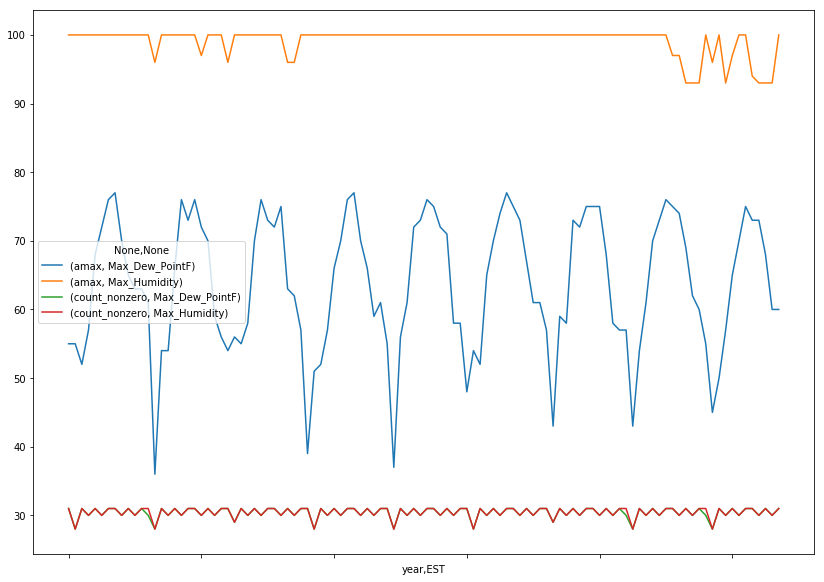

In [24]:
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).plot(figsize=(14,10))

In [25]:
# We can "unstack" to pull a left index into a column (0 is the left most index)
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).unstack(0)

amax                                                  \
     Max_Dew_PointF                                                   
year           2006  2007  2008  2009  2010  2011  2012  2013  2014   
EST                                                                   
1              55.0  61.0  54.0  39.0  55.0  48.0  57.0  57.0  55.0   
2              55.0  36.0  56.0  51.0  37.0  54.0  43.0  43.0  45.0   
3              52.0  54.0  55.0  52.0  56.0  52.0  59.0  54.0  50.0   
4              57.0  54.0  58.0  57.0  61.0  65.0  58.0  61.0  57.0   
5              68.0  66.0  70.0  66.0  72.0  70.0  73.0  70.0  65.0   
6              72.0  76.0  76.0  70.0  73.0  74.0  72.0  73.0  70.0   
7              76.0  73.0  73.0  76.0  76.0  77.0  75.0  76.0  75.0   
8              77.0  76.0  72.0  77.0  75.0  75.0  75.0  75.0  73.0   
9              70.0  72.0  75.0  70.0  72.0  73.0  75.0  74.0  73.0   
10             65.0  70.0  63.0  66.0  71.0  67.0  68.0  69.0  68.0   
11             63.0  59.0  62.0  59.0  58.0  61.0  58.0  62.0  60.0   
12             63.0  56.0  57.0  61.0  58.0  61.0  57.0  60.0  60.0   

                   ...   count_nonzero                                       \
     Max_Humidity  ...  Max_Dew_PointF Max_Humidity                           
year         2006  ...            2014         2006  2007  2008  2009  2010   
EST                ...                                                        
1           100.0  ...            30.0         31.0  31.0  31.0  31.0  31.0   
2           100.0  ...            28.0         28.0  28.0  29.0  28.0  28.0   
3           100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
4           100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
5           100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
6           100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
7           100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
8           100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
9           100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
10          100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
11          100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
12          100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   

                              
                              
year  2011  2012  2013  2014  
EST                           
1     31.0  31.0  31.0  31.0  
2     28.0  29.0  28.0  28.0  
3     31.0  31.0  31.0  31.0  
4     30.0  30.0  30.0  30.0  
5     31.0  31.0  31.0  31.0  
6     30.0  30.0  30.0  30.0  
7     31.0  31.0  31.0  31.0  
8     31.0  31.0  31.0  31.0  
9     30.0  30.0  30.0  30.0  
10    31.0  31.0  31.0  31.0  
11    30.0  30.0  30.0  30.0  
12    31.0  31.0  31.0  31.0  

[12 rows x 36 columns]

In [26]:
# We can "unstack" to pull a left index into a column (1 is the 2nd index)
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).unstack(1)

amax                                                        \
     Max_Dew_PointF                                                         
EST              1     2     3     4     5     6     7     8     9     10   
year                                                                        
2006           55.0  55.0  52.0  57.0  68.0  72.0  76.0  77.0  70.0  65.0   
2007           61.0  36.0  54.0  54.0  66.0  76.0  73.0  76.0  72.0  70.0   
2008           54.0  56.0  55.0  58.0  70.0  76.0  73.0  72.0  75.0  63.0   
2009           39.0  51.0  52.0  57.0  66.0  70.0  76.0  77.0  70.0  66.0   
2010           55.0  37.0  56.0  61.0  72.0  73.0  76.0  75.0  72.0  71.0   
2011           48.0  54.0  52.0  65.0  70.0  74.0  77.0  75.0  73.0  67.0   
2012           57.0  43.0  59.0  58.0  73.0  72.0  75.0  75.0  75.0  68.0   
2013           57.0  43.0  54.0  61.0  70.0  73.0  76.0  75.0  74.0  69.0   
2014           55.0  45.0  50.0  57.0  65.0  70.0  75.0  73.0  73.0  68.0   

      ...  count_nonzero                                                        
      ...   Max_Humidity                                                        
EST   ...             3     4     5     6     7     8     9     10    11    12  
year  ...                                                                       
2006  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2007  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2008  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2009  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2010  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2011  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2012  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2013  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2014  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  

[9 rows x 48 columns]

In [27]:
# Just use one value and one aggregation
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(1)

amax                                                        \
     Mean_TemperatureF                                                         
EST                 1     2     3     4     5     6     7     8     9     10   
year                                                                           
2006              53.0  54.0  61.0  70.0  78.0  81.0  86.0  90.0  75.0  71.0   
2007              63.0  44.0  64.0  72.0  78.0  82.0  84.0  84.0  80.0  77.0   
2008              59.0  55.0  54.0  71.0  72.0  86.0  87.0  82.0  80.0  67.0   
2009              41.0  55.0  61.0  80.0  73.0  75.0  79.0  84.0  77.0  67.0   
2010              53.0  40.0  64.0  74.0  79.0  85.0  92.0  86.0  86.0  70.0   
2011              47.0  57.0  64.0  69.0  79.0  84.0  94.0  83.0  79.0  72.0   
2012              54.0  55.0  67.0  77.0  80.0  87.0  87.0  83.0  83.0  70.0   
2013              49.0  46.0  50.0  67.0  83.0  83.0  90.0  81.0  87.0  76.0   
2014              48.0  49.0  56.0  67.0  76.0  83.0  82.0  82.0  85.0  73.0   

                  
                  
EST     11    12  
year              
2006  64.0  60.0  
2007  58.0  51.0  
2008  63.0  58.0  
2009  61.0  59.0  
2010  56.0  50.0  
2011  63.0  59.0  
2012  57.0  55.0  
2013  65.0  66.0  
2014  61.0  54.0

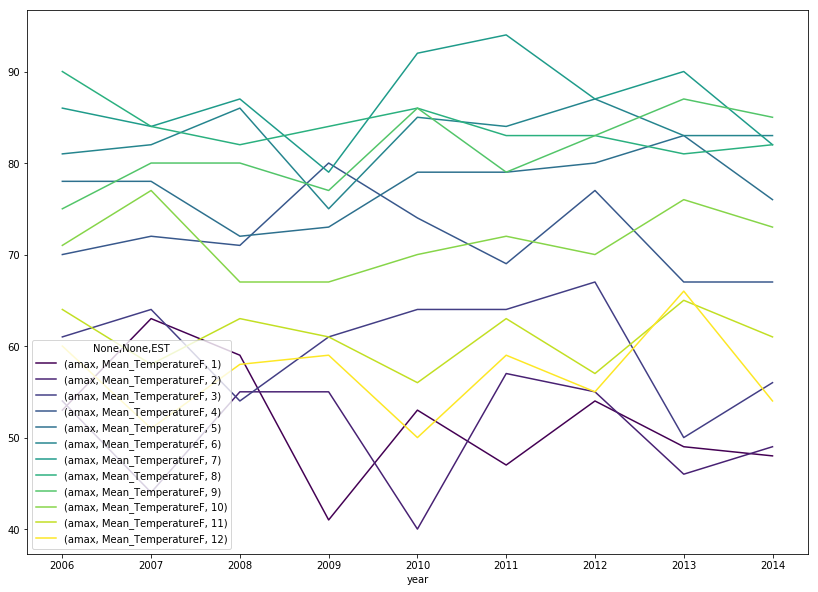

In [28]:
# Just use one value and one aggregation by year
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(1).plot(cmap='viridis', figsize=(14,10))

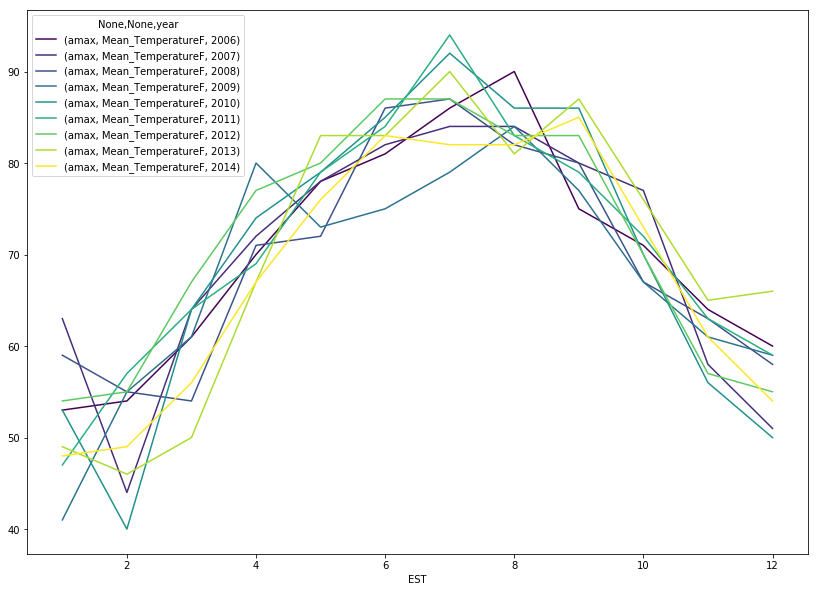

In [29]:
# Just use one value and one aggregation by month
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(0).plot(cmap='viridis', figsize=(14,10))

## Pivoting Assignment
With the nino dataset:
* Pivot the nino data using the ``.pivot_table`` method. Group by year and month, the ``air_temp`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions. (You will either need to create a month column or use ``year_month_day.dt.month``)
* Plot a line plot of the previous pivot table

In [33]:
nino.pivot_table(index=[nino.year_month_day.dt.year.rename('year'), 
                        nino.year_month_day.dt.month], 
                 aggfunc=[np.max, np.min, np.mean],
                values=['air_temp_'])

amax      amin       mean
                    air_temp_ air_temp_  air_temp_
year year_month_day                               
1980 3                  27.28     24.66  25.793478
     8                  23.12     20.95  21.878095
     9                  22.93     21.72  22.167000
     10                 22.45     20.42  21.278387
     11                 23.68     22.18  22.827333
     12                 24.53     22.09  23.173871
1981 1                  23.25     22.35  22.801935
     2                  24.97     22.92  23.888214
     3                  27.20     23.98  25.377097
     4                  26.37     25.13  25.665000
     5                  25.75     23.69  25.087419
     6                  24.99     23.20  23.941000
     7                  23.83     19.54  21.821724
     8                  22.71     18.30  20.198387
     9                  22.29     18.83  20.814667
     10                 23.16     19.82  21.609516
     11                 22.93     20.17  21.533833
     12                 23.96     20.49  22.755645
1982 1                  24.86     23.06  23.729032
     2                  26.65     24.14  25.163929
     3                  26.39     24.70  25.570217
     4                  26.13     24.10  25.203667
     5                  26.02     24.68  25.340645
     6                  24.87     22.88  24.055000
     7                  23.18     21.53  22.356452
     8                  22.99     20.96  22.091290
     9                  23.75     22.25  23.040667
     10                 25.99     22.97  24.534444
     11                 26.89     24.26  25.626833
     12                 27.50     25.17  26.346452
...                       ...       ...        ...
1996 1                  30.19     22.59  26.449889
     2                  29.87     23.43  26.700075
     3                  29.83     24.04  27.141827
     4                  29.47     22.51  27.128275
     5                  29.57     22.57  27.027995
     6                  29.30     19.75  26.762269
     7                  29.34     17.54  26.689013
     8                  29.64     18.00  26.494612
     9                  29.76     17.92  26.450424
     10                 29.64     18.46  26.359509
     11                 29.83     19.22  26.269661
     12                 30.03     20.02  26.292109
1997 1                  29.68     20.80  26.573554
     2                  29.65     21.89  26.943140
     3                  30.02     22.62  27.353986
     4                  29.64     23.74  27.668450
     5                  29.65     24.98  27.938080
     6                  29.56     25.09  27.768978
     7                  30.04     23.69  27.819077
     8                  29.84     20.57  27.574505
     9                  29.85     24.20  27.660637
     10                 29.98     23.89  27.724844
     11                 29.77     24.36  27.904790
     12                 30.13     22.82  27.949475
1998 1                  31.66     25.03  27.847688
     2                  29.59     24.99  27.734042
     3                  29.96     25.23  27.868219
     4                  30.08     21.37  27.895766
     5                  30.26     23.87  27.931499
     6                  30.04     22.61  27.293246

[211 rows x 3 columns]

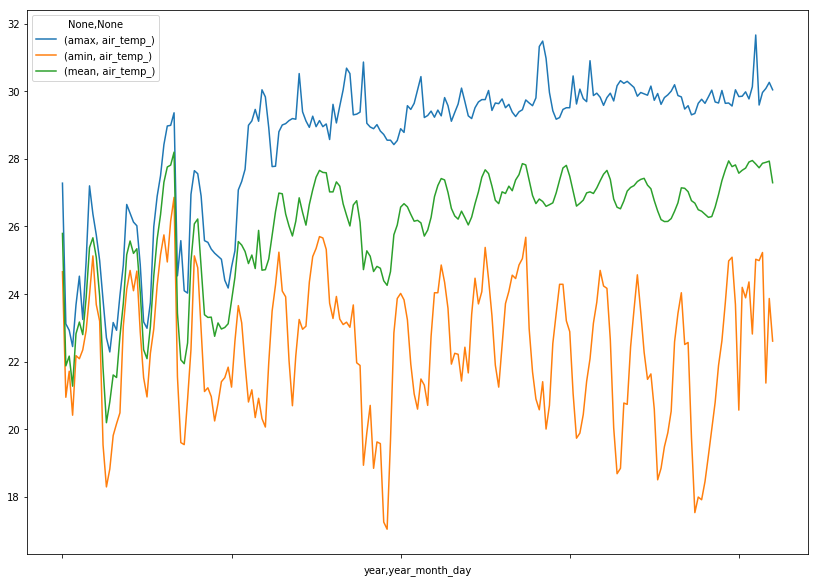

In [34]:
nino.pivot_table(index=[nino.year_month_day.dt.year.rename('year'), 
                        nino.year_month_day.dt.month], 
                 aggfunc=[np.max, np.min, np.mean],
                values=['air_temp_']).plot(figsize=(14,10))

## Pivoting Bonus Assignment
* Using ``.groupby`` we can sometimes perform the same operation as pivot tables. Pivot the nino data using the ``.groupby`` method. Group by year and month, the ``air_temp_`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions using ``.groupby``. (Hint: Use the ``.agg`` method on the result of the group by)
* Use ``.unstack`` to see the mean ``air_temp_`` by year

In [40]:
nino.groupby([nino.year_month_day.dt.year.rename('year'), 
             nino.year_month_day.dt.month]).agg(
    ['max', 'min', 'mean'])['air_temp_']

max    min       mean
year year_month_day                         
1980 3               27.28  24.66  25.793478
     8               23.12  20.95  21.878095
     9               22.93  21.72  22.167000
     10              22.45  20.42  21.278387
     11              23.68  22.18  22.827333
     12              24.53  22.09  23.173871
1981 1               23.25  22.35  22.801935
     2               24.97  22.92  23.888214
     3               27.20  23.98  25.377097
     4               26.37  25.13  25.665000
     5               25.75  23.69  25.087419
     6               24.99  23.20  23.941000
     7               23.83  19.54  21.821724
     8               22.71  18.30  20.198387
     9               22.29  18.83  20.814667
     10              23.16  19.82  21.609516
     11              22.93  20.17  21.533833
     12              23.96  20.49  22.755645
1982 1               24.86  23.06  23.729032
     2               26.65  24.14  25.163929
     3               26.39  24.70  25.570217
     4               26.13  24.10  25.203667
     5               26.02  24.68  25.340645
     6               24.87  22.88  24.055000
     7               23.18  21.53  22.356452
     8               22.99  20.96  22.091290
     9               23.75  22.25  23.040667
     10              25.99  22.97  24.534444
     11              26.89  24.26  25.626833
     12              27.50  25.17  26.346452
...                    ...    ...        ...
1996 1               30.19  22.59  26.449889
     2               29.87  23.43  26.700075
     3               29.83  24.04  27.141827
     4               29.47  22.51  27.128275
     5               29.57  22.57  27.027995
     6               29.30  19.75  26.762269
     7               29.34  17.54  26.689013
     8               29.64  18.00  26.494612
     9               29.76  17.92  26.450424
     10              29.64  18.46  26.359509
     11              29.83  19.22  26.269661
     12              30.03  20.02  26.292109
1997 1               29.68  20.80  26.573554
     2               29.65  21.89  26.943140
     3               30.02  22.62  27.353986
     4               29.64  23.74  27.668450
     5               29.65  24.98  27.938080
     6               29.56  25.09  27.768978
     7               30.04  23.69  27.819077
     8               29.84  20.57  27.574505
     9               29.85  24.20  27.660637
     10              29.98  23.89  27.724844
     11              29.77  24.36  27.904790
     12              30.13  22.82  27.949475
1998 1               31.66  25.03  27.847688
     2               29.59  24.99  27.734042
     3               29.96  25.23  27.868219
     4               30.08  21.37  27.895766
     5               30.26  23.87  27.931499
     6               30.04  22.61  27.293246

[211 rows x 3 columns]

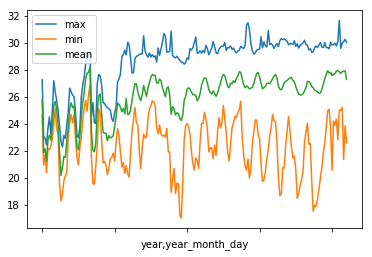

In [41]:
nino.groupby([nino.year_month_day.dt.year.rename('year'), 
             nino.year_month_day.dt.month]).agg(
    ['max', 'min', 'mean'])['air_temp_'].plot()

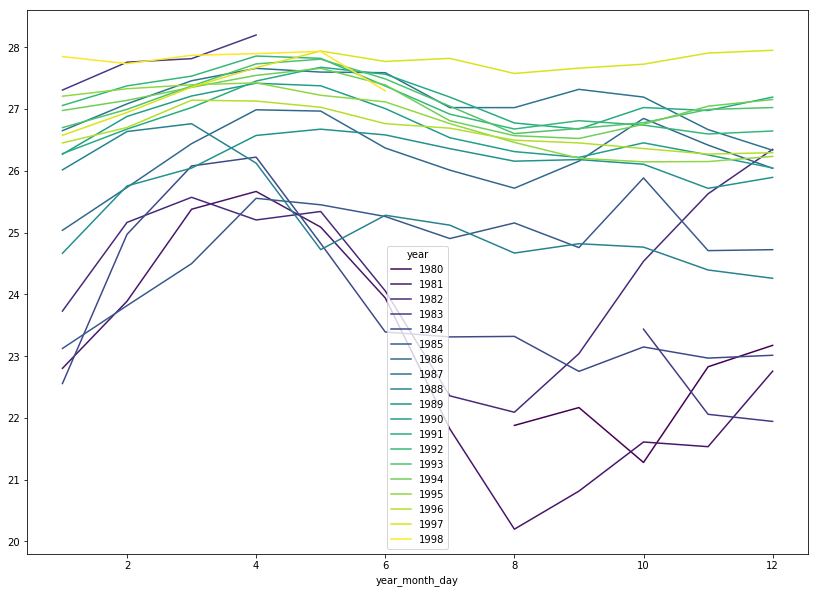

In [43]:
_=nino.groupby([nino.year_month_day.dt.year.rename('year'), 
             nino.year_month_day.dt.month]).agg(
    'mean')['air_temp_'].unstack(0).plot(cmap='viridis', figsize=(14,10))